In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [2]:
# Wartość mieszkania za 5 lat

In [3]:
cena_poczatkowa = 120000
tempo_wzrostu_roczne = 0.05
liczba_miesiecy_w_roku = 12
liczba_lat = 5
liczba_miesiecy = liczba_lat * liczba_miesiecy_w_roku
periods = np.arange(1,liczba_miesiecy+1,dtype=int)

In [4]:
tempo_wzrostu_miesieczne = (1 + tempo_wzrostu_roczne) ** (1 / liczba_miesiecy_w_roku) - 1
np.set_printoptions(precision=2)
ceny_miesieczne = cena_poczatkowa * (1 + tempo_wzrostu_miesieczne) ** np.arange(1, liczba_miesiecy + 1)
print(tempo_wzrostu_miesieczne)
print(ceny_miesieczne)

0.0040741237836483535
[120488.89 120979.78 121472.67 121967.56 122464.47 122963.41 123464.38
 123967.39 124472.44 124979.56 125488.74 126000.   126513.34 127028.77
 127546.3  128065.94 128587.7  129111.58 129637.6  130165.76 130696.07
 131228.54 131763.18 132300.   132839.01 133380.21 133923.62 134469.24
 135017.08 135567.16 136119.48 136674.04 137230.87 137789.97 138351.34
 138915.   139480.96 140049.22 140619.8  141192.7  141767.94 142345.52
 142925.45 143507.75 144092.41 144679.46 145268.91 145860.75 146455.
 147051.68 147650.79 148252.33 148856.33 149462.79 150071.72 150683.13
 151297.03 151913.44 152532.35 153153.79]


In [5]:
# https://numpy.org/numpy-financial/latest/
# fv(rate, nper, pmt, pv[, when])
flat_future =  -np.around(npf.fv(tempo_wzrostu_miesieczne,liczba_miesiecy,0,cena_poczatkowa),2)
flat_future

153153.79

In [6]:
print(f"Wartość mieszkania za 5 lat wynosi: {flat_future} zł")

Wartość mieszkania za 5 lat wynosi: 153153.79 zł


In [7]:
# Wartość wpłat aby po 5 latach przy oprocentowaniu rocznym 12% i kapitalizacji miesięcznej mieć wartość "flat_future"
# pmt(rate, nper, pv[, fv, when])  Compute the payment against loan principal plus interest.

In [8]:
monthly_payment = -flat_future  # wpłata zamiast kredytu
interest_rate = 0.12
tempo_wzrostu_miesieczne_lokata = (1 + interest_rate) ** (1 / liczba_miesiecy_w_roku) - 1
np.set_printoptions(precision=2)
print(tempo_wzrostu_miesieczne_lokata)

0.009488792934583046


In [9]:
monthly_payment = np.around(npf.pmt(tempo_wzrostu_miesieczne_lokata,liczba_miesiecy,0,monthly_payment),2)
print(f'Miesięczna wpłata, która przy oprocentowaniu 12% i kapilalizacji miesięcznej wyniesie {monthly_payment}.')

Miesięczna wpłata, która przy oprocentowaniu 12% i kapilalizacji miesięcznej wyniesie 1906.29.


In [10]:
wartosc_lokaty = - np.around(npf.fv(tempo_wzrostu_miesieczne_lokata,periods,monthly_payment,monthly_payment),2)
print(wartosc_lokaty)

[  3830.67   5773.31   7734.38   9714.06  11712.52  13729.95  15766.52
  17822.42  19897.82  21992.92  24107.89  26242.94  28398.24  30574.
  32770.4   34987.64  37225.92  39485.44  41766.4   44069.    46393.45
  48739.96  51108.73  53499.98  55913.92  58350.77  60810.74  63294.05
  65800.92  68331.58  70886.26  73465.17  76068.56  78696.65  81349.67
  84027.87  86731.49  89460.75  92215.92  94997.23  97804.92 100639.26
 103500.5  106388.88 109304.68 112248.14 115219.53 118219.11 121247.16
 124303.94 127389.72 130504.78 133649.41 136823.87 140028.45 143263.44
 146529.13 149825.81 153153.76 156513.3 ]


In [11]:
# Wykres

Text(0, 0.5, 'Skumulowana wartość')

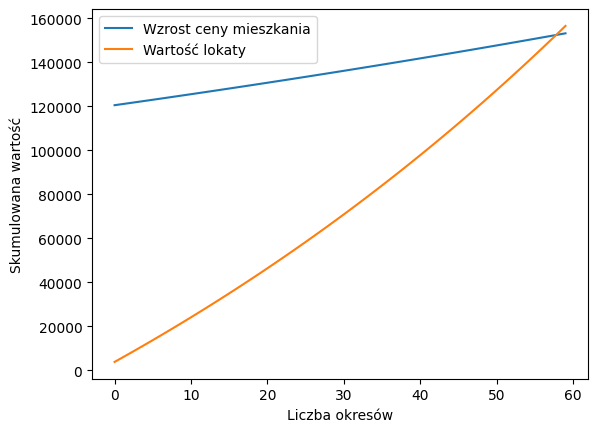

In [12]:
plt.plot(ceny_miesieczne,label='Wzrost ceny mieszkania')
plt.plot(wartosc_lokaty,label='Wartość lokaty')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Skumulowana wartość')